In [49]:
import matplotlib.pyplot as plt
import numpy as np

In [197]:
p=500

In [198]:
def polynomial(x):
    return 2*x+112

In [199]:
xis=np.arange(1,6,1)

In [200]:
skis=[polynomial(t) for t in xis]

In [201]:
skis

[114, 116, 118, 120, 122]

In [202]:
xis

array([1, 2, 3, 4, 5])

In [203]:
users=["Alice", "Bob", "Charles", "Dean", "Emily"]

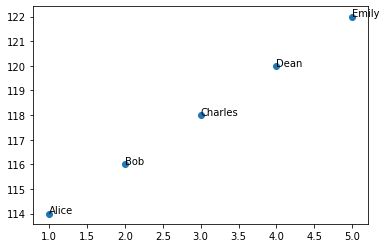

In [204]:
for i, txt in enumerate(users):
    plt.annotate(txt, (xis[i], skis[i]))
plt.scatter(xis,skis)

In [205]:
def li(xms,xi, x):
    xmsno=[s for s in xms if s != xi]
    s= np.prod([x-xm/(xi-xm) for xm in xmsno])
    return s

In [206]:
def interpolation(xis, yis, x):
    xms=[yis[i]*li(xis,xis[i],x) for (i) in range(len(xis))]
    return np.sum(xms)

In [207]:
user_ids=[1,3]

In [208]:
print(user_ids)
skis_=[skis[user_id] for user_id in user_ids]
print(skis_)

[1, 3]
[116, 120]


In [209]:
user_ids

[1, 3]

In [210]:
def plot_interpolation(_usernames, _xis, _yis):
    for i, username in enumerate(_usernames):
        plt.annotate(username, (_xis[i], _yis[i]))
    plt.scatter(_xis,_yis)
    plt.scatter(0,interpolation(_xis, _yis, 0))
    plt.annotate("interpolation",(0,interpolation(_xis, _yis, 0)))
    plt.show()

### To understand, we could interpolate the shared private key 

In [211]:
def filterByList(_els, _indexes):
    return [_els[i] for i in _indexes]

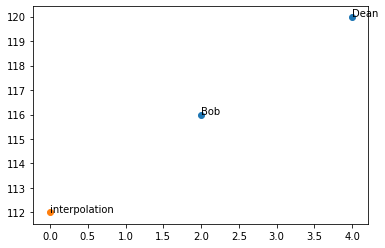

In [212]:
plot_interpolation(filterByList(users, user_ids), filterByList(xis, user_ids),filterByList(skis, user_ids))

### In general, this is never done for threshold signatures as we don't want anybody to know the private key

### Instead, every signer involved choose k_i randomly

In [222]:
import random

In [223]:
kis=[random.randint(0,p) for i in range(len(users))]

In [224]:
fUsers,fXis, fKis, fSk =filterByList(users, user_ids), filterByList(xis, user_ids), filterByList(kis, user_ids), filterByList(skis, user_ids)

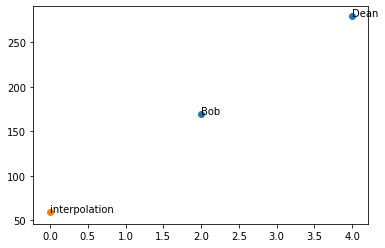

In [225]:
plot_interpolation(fUsers, fXis,fKis)

### The challenge is sent by the verifier

In [226]:
c=random.randint(0,p)

### Every involved signer sign 

In [227]:
sis=[(ki-c*ski)%p for (u,xi,ki, ski) in zip(fUsers, fXis, fKis, fSk)]

### We can interpolate the threshold signature only with these two

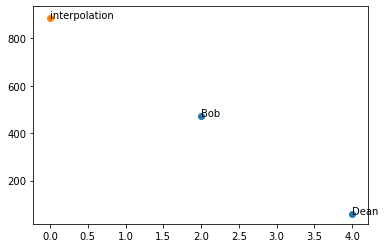

In [228]:
plot_interpolation( fUsers,fXis, sis)

### The final signature is 

In [242]:
signature=interpolation(user_ids, sis, 0)

### Compare it if we leaked the shared sk

In [243]:
sk=interpolation(user_ids, fSk, 0)
k=interpolation(user_ids, fKis, 0)
signatureCheck=(k-c*sk)%p

In [244]:
signature%p==signatureCheck

True